# Seaview Dataset: Exploratory Data Analysis (EDA)

## Introduction

### Background

**Source Dataset:**

The dataset for Coral Segmentation is taken from Seaview Survey Photo-quadrat and Image Classification Dataset [1] which was created as part of XL Catlin Seaview Survey Project as a collaboration between The University of Queensland and ocean conservation non-profit Underwater Earth. The goal of the XL Catlin Seaview Survey Project was to conduct rapid, detailed yet globally distributed scientific surveys of coral reefs to support research and conservation. See [2] for detailed description of this dataset.

Underwater images were captured by using a customised diver propulsion vehicle that comprised of three DSLR cameras and wide array of sensors. Each dive resulted in a transect of approximately two kilometres in length. Images were cropped to 1 $m^2$, using the distance from the seafloor captured by a transponder to standardise the spatial resolution of an image to an average of 10 $ {px} / {cm}$ [3].

**Project Methodology:**

The XL Catlin Seaview Survey project team collected about 1.5 TB worth of photographs covering over 1300 km fore-reef slopes and performed various scientific studies aimed at better understanding of the coral reef ecosystem and planning appropriate conservation efforts.

Due to the humongous number of photographs (~360,000 images / ~ 1 million quadrats) that were acquired, it was impossible to manually label the different types of coral species & functional groups in each photograph. So, the project team used "Random Points Count" methodology as descripbed below:

* Manually (visually) annotate about 860,000 random points (across about 11,600 quadrats) by human experts on corals. These points were annotated by extracting square patches from each photo-quadrat, with the random points as their centres.
* Train (and fine tune) neural networks (1 per territory) using the manually annotated patches from photo-quadrats. A scientific study found that machine annotations were comparable to human annotations in terms of accuracy.
* Use the trained & fine tuned neural networks to label the rest of the (non-annotated) dataset. This was done by transforming the photo-quadras into patches based on 50 annotation points and then running neural classifiers on the patches.
* Compute benthic cover for each image and then derive summary for each survey / location / territory.

**Citations & References:**

[1] González-Rivero, Manuel, Rodriguez-Ramirez, Alberto, Beijbom, Oscar, Dalton, Peter, Kennedy, Emma V., Neal, Benjamin P., Vercelloni, Julie, Bongaerts, Pim, Ganase, Anjani, Bryant, Dominic E.P., Brown, Kristen, Kim, Catherine, Radice, Veronica Z., Lopez-Marcano, Sebastian, Dove, Sophie, Bailhache, Christophe, Beyer, Hawthorne L., and Hoegh-Guldberg, Ove(2019). Seaview Survey Photo-quadrat and Image Classification Dataset. The University of Queensland. Data Collection. https://doi.org/10.14264/uql.2019.930

[2] Seaview Survey Photo-quadrat and Image Classification Dataset - https://espace.library.uq.edu.au/view/UQ:734799/Seaview_Survey_photoquadrat_Data.pdf?dsi_version=0056d5a4bc5c51060f9110f13eec2df0

[3] González-Rivero, M.; Beijbom, O.; Rodriguez-Ramirez, A.; Bryant, D.E.P.; Ganase, A.; Gonzalez-Marrero, Y.; Herrera-Reveles, A.; Kennedy, E.V.; Kim, C.J.S.; Lopez-Marcano, S.; Markey, K.; Neal, B.P.; Osborne, K.; Reyes-Nivia, C.; Sampayo, E.M.; Stolberg, K.; Taylor, A.; Vercelloni, J.; Wyatt, M.; Hoegh-Guldberg, O. Monitoring of Coral Reefs Using Artificial Intelligence: A Feasible and Cost-Effective Approach. Remote Sens. 2020, 12, 489. https://doi.org/10.3390/rs12030489

### Current Scope

The complete human "annotated" dataset from XL Catlin Seaview Survey Project was made available to FruitPunch AI for their AI for Coral Reefs - Part 2 Challenge.

This dataset is used in this notebook with the objective of doing exploratory data analysis to better understand the dataset and subsequently use the dataset for **building unsupervied / semi-supervised / self-supervised ML models for coral segmentation as well as classification into 3 main functional groups** of interest, namely:
* Hard Coral,
* Soft Coral,
* Others -
    * Algae,
    * Other Invertebrates, and
    * Other organisms or items found under water: Fish, Sand, Rubble etc.

### Point Labels Dataset

The point labels dataset hosted by FruitPunch AI can be found at https://drive.google.com/drive/folders/1Jt37k5M4o5aOjiyshusLPbWsjpO425ks?usp=drive_link.

This dataset contains a total of 11387 images (quadrats or photo-quadrats - which cover 1$m^2$ coral/sea substrate footprint) across 9 different geographic regions with each image containing 50-300 random point annotations. The detailed break-up is shown in below table (refer https://www.nature.com/articles/s41597-020-00698-6/tables/3 for details from the original paper which mentions a total of 11548 annotated images):

|Sl No|**Region / Folder**|**Country or Territory**|**# of Quadrats**|**# of Points**|**Points Per Quadrat**|
|---|---|---|---|---|---|
|1|ATL|Western Atlantic Ocean|1407|92900|50-150|
|2|IND_CHA|Indian Ocean, Chagos Archipelago|686|52450|50-150|
|3|IND_MDV|Indian Ocean, Maldives|1612|144100|50-300|
|4|PAC_AUS|Pacific Ocean, Australia|2657|186420|40-200|
|5|PAC_USA|Pacific Ocean, United States|1153|83100|50-150|
|6|PAC_IDN_PHL|Pacific Ocean, Indonesia and Philippines|1638|120100|50-150|
|7|PAC_SLB|Pacific Ocean, Solomon Islands|732|59200|50-200|
|8|PAC_TWN|Pacific Ocean, Taiwan|638|50000|50-150|
|9|PAC_TLS|Pacific Ocean, Timor-Leste|864|71600|50-200|
||**Total**||**11387**|**859870**|**40-300**|

The manual annotations done by coral experts on the photo-quadrats for each of the 859,870 random points is provided in CSV files (single large CSV file will all annotationas as well as one CSV file per region). The columns of this file are described below:

|Column Name|Description|
|---|---|
|quadratid|Quadrat ID number. Also the filename of an image: quadratid + ".jpg"|
|y|"y" coordinates of the pixel that has been classified, in reference to the top left of the image with an origin 1,1 index|
|x|"x" coordinates of the pixel that has been classified, in reference to the top left of the image with an origin 1,1 index|
|label_name|Descriptive name of species|
|label|Shortcode representing the species (or features) of interest|
|func_group|5 main groups of interest: Algae, Hard Coral, Soft Coral, Other Invertebrates, Other|
|method|Annotation points generation method (random or target)|
|data_set|train or test|

### Mask Labels Dataset

The mask labels dataset (manually created dense segmentation ground truths) by ReefSupport and shared with FruitPunch AI can be found at:
https://drive.google.com/drive/folders/1Ez3qRfMf52G3z-XiEjJkvJcP6uYa2_xW?usp=drive_link

This dataset is a collection of subset of coral images from multiple sources and contains dense segmentation masks created by ReefSupport team. The masks are available at two levels of granularity -
1. Masks for small / fixed size windows from the image (multiple masks per image)
2. Masks for full image (by stitching together smaller sized masks)

This notebook focuses on the subset of images taken from XL Catlin Seaview dataset. This dataset contains a total of  images (quadrats or photo-quadrats - which cover 1$m^2$ coral/sea substrate footprint) across 4 different geographic regions. The detailed break-up is shown in below table:

|Region #|**Region / Folder**|**Country or Territory**|**# of Quadrats (reef_support)**|**# of Quadrats (Seaview)**|**Points Per Quadrat (Seaview)**|
|---|---|---|---|---|---|
|1|ATL|Western Atlantic Ocean|705|1407|50-150|
|4|PAC_AUS|Pacific Ocean, Australia|808|2657|40-200|
|5|PAC_USA|Pacific Ocean, United States|728|1153|50-150|
|6|PAC_IDN_PHL|Pacific Ocean, Indonesia and Philippines|466|1638|50-150|
||**Total**||**2707**|**11387**|**40-200**|

## Dependencies & Setups

### Libraries

In [1]:
import os
import cv2
import imagesize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from google.colab import drive

### Working Folder Setup

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Root folder in Google Drive for this project
DRIVE_BASE_PATH = '/content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2'

# Point Labels Dataset

## Global Variables

In [4]:
# Original data and annotations path
DATA_BASE_PATH = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'point_labels', 'SEAVIEW')
ANNOTATIONS_PATH = os.path.join(DATA_BASE_PATH, 'tabular-data')

In [5]:
REGIONS = {
    1: 'ATL', 2: 'IND_CHA', 3: 'IND_MDV', 4: 'PAC_AUS', 5: 'PAC_USA',
    6: 'PAC_IDN_PHL', 7: 'PAC_SLB', 8: 'PAC_TWN', 9: 'PAC_TLS',
    }
IMAGE_COUNTS = {
    1: 1407, 2: 686, 3: 1612, 4: 2657, 5: 1153,
    6: 1638, 7: 732, 8: 638, 9: 864,
    }
POINT_COUNTS = {
    1: 92900, 2: 52450, 3: 144100, 4: 186420, 5: 83100,
    6: 120100, 7: 59200, 8: 50000, 9: 71600,
    }

## Point Labels Data Frame

Merge region wise annotation csv files into a single data frame

In [6]:
# initialize a data frame to hold the annotations across all regions
ANNOTATIONS_DF = pd.DataFrame()

# read individual region specific annotations file and append to main data frame
# region speicific annotation files contain additional useful columns

# loop through the list of regions
for region in tqdm(REGIONS.values(), total=len(REGIONS)):

    # read region specific annotation file
    region_wise_annotations_df = \
        pd.read_csv(
            os.path.join(ANNOTATIONS_PATH, f"annotations_{region}.csv"),
            header='infer',
        )

    # assign region name under to which image files belong to
    region_wise_annotations_df['region'] = region

    # append to main annotations data frame
    ANNOTATIONS_DF = \
        pd.concat(
            [ANNOTATIONS_DF, region_wise_annotations_df],
            ignore_index=True,
            )

  0%|          | 0/9 [00:00<?, ?it/s]

Add an alternate functional group column in line with the primary objective of this project - to identify Hard Corals and Soft Corals.

In [7]:
ANNOTATIONS_DF['func_group_alt'] = \
    [func_group if func_group in ('Hard Coral', 'Soft Coral') else 'Others'
     for func_group in ANNOTATIONS_DF.func_group]

In [8]:
region_wise_annotations_df

quadratid    y    x  \
0      30002121501   83   85   
1      30002121501   93  319   
2      30002121501  128  457   
3      30002121501  245  578   
4      30002121501  163  670   
...            ...  ...  ...   
71595  30027261001  910  700   
71596  30027261001  905  933   
71597  30027261001  930  876   
71598  30027261001  826  884   
71599  30027261001  829  914   

                                              label_name       label  \
0                                  Loose Substrate: Sand   LSUB_SAND   
1                                  Loose Substrate: Sand   LSUB_SAND   
2      Other soft-corals no common Alcyoniidae and er...  SINV_SFC_O   
3      Other soft-corals no common Alcyoniidae and er...  SINV_SFC_O   
4      Other soft-corals no common Alcyoniidae and er...  SINV_SFC_O   
...                                                  ...         ...   
71595           Epilithic algal matirx smotheting rubble      EAM_RB   
71596           Epilithic algal matirx smotheting rubble      EAM_RB   
71597           Epilithic algal matirx smotheting rubble      EAM_RB   
71598           Epilithic algal matirx smotheting rubble      EAM_RB   
71599           Other sesile invertebrates Bryozoa clams    SINV_OTH   

                func_group  method data_set   region  
0                    Other  random    train  PAC_TLS  
1                    Other  random     test  PAC_TLS  
2               Soft Coral  random     test  PAC_TLS  
3               Soft Coral  random     test  PAC_TLS  
4               Soft Coral  random     test  PAC_TLS  
...                    ...     ...      ...      ...  
71595                Algae  random    train  PAC_TLS  
71596                Algae  random    train  PAC_TLS  
71597                Algae  random    train  PAC_TLS  
71598                Algae  random    train  PAC_TLS  
71599  Other Invertebrates  random    train  PAC_TLS  

[71600 rows x 9 columns]

In [9]:
ANNOTATIONS_DF

quadratid    y    x                                label_name  \
0       17001738002  180  183                                      Fish   
1       17001738002  199  162                                       CCA   
2       17001738002  197  160                                       CCA   
3       17001738002   88  561                                      Turf   
4       17001738002  195  714                                  Ocomplex   
...             ...  ...  ...                                       ...   
859865  30027261001  910  700  Epilithic algal matirx smotheting rubble   
859866  30027261001  905  933  Epilithic algal matirx smotheting rubble   
859867  30027261001  930  876  Epilithic algal matirx smotheting rubble   
859868  30027261001  826  884  Epilithic algal matirx smotheting rubble   
859869  30027261001  829  914  Other sesile invertebrates Bryozoa clams   

           label           func_group  method data_set   region func_group_alt  
0           FISH                Other  random     test      ATL         Others  
1            CCA                Algae  random     test      ATL         Others  
2            CCA                Algae  random     test      ATL         Others  
3           Turf                Algae  random     test      ATL         Others  
4           OCOM           Hard Coral  random     test      ATL     Hard Coral  
...          ...                  ...     ...      ...      ...            ...  
859865    EAM_RB                Algae  random    train  PAC_TLS         Others  
859866    EAM_RB                Algae  random    train  PAC_TLS         Others  
859867    EAM_RB                Algae  random    train  PAC_TLS         Others  
859868    EAM_RB                Algae  random    train  PAC_TLS         Others  
859869  SINV_OTH  Other Invertebrates  random    train  PAC_TLS         Others  

[859870 rows x 10 columns]

## Random Points Data Frame

The csv file seaviewsurvey_annotations.csv contains random point annotations for all photoquadrats extracted from all photos (not just the training and test photoquadrats which are provided as image files in different folders)

In [ ]:
RANDOM_POINTS_DF = \
    pd.read_csv(
        os.path.join(ANNOTATIONS_PATH, 'seaviewsurvey_annotations.csv'),
        header='infer',
    )

In [ ]:
RANDOM_POINTS_DF.shape

(55229185, 4)

In [ ]:
RANDOM_POINTS_DF.head(5)

quadratid   y    x   label
0  10001000701  57  803  OTH-SF
1  10001000701  66  200    DSUB
2  10001000701  73  165  OTH-SF
3  10001000701  83  716  OTH-SF
4  10001000701  88  699  OTH-SF

In [ ]:
RANDOM_POINTS_DF.quadratid.nunique()

1082324

In [ ]:
RANDOM_POINTS_DF[~RANDOM_POINTS_DF.quadratid.isin(ANNOTATIONS_DF.quadratid.unique())].shape

(54663536, 4)

In [ ]:
RANDOM_POINTS_DF[~RANDOM_POINTS_DF.quadratid.isin(ANNOTATIONS_DF.quadratid.unique())].quadratid.nunique()

1071066

## Objectives for EDA

The following aspects will be analyzed as part of Exploratory Data Analysis (EDA):
1. Cross-check Annotations & Images: Check if the count and names of images in each folder is in agreement with the annotations csv.
2. Cross-check Annotation Points: Check if the number of random point annotations agree with the summary provided above.
3. Train-Test Leakage Check: See if train and test samples have any overlaps based on data_set column provided in annotations file.
4. Annotation Statistics: Check the distribution of annotations in terms of labels and functional groups within each region or across all regions.
5. Sanity Check Images: Randomly visualize the images and verify if the annotations make sense when overlaid on the respective images.

## Sanity Check Annotations File

### Data Types

In [10]:
ANNOTATIONS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859870 entries, 0 to 859869
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   quadratid       859870 non-null  int64 
 1   y               859870 non-null  int64 
 2   x               859870 non-null  int64 
 3   label_name      859870 non-null  object
 4   label           859870 non-null  object
 5   func_group      859870 non-null  object
 6   method          859870 non-null  object
 7   data_set        859870 non-null  object
 8   region          859870 non-null  object
 9   func_group_alt  859870 non-null  object
dtypes: int64(3), object(7)
memory usage: 65.6+ MB


**Observations:**

1. y and x coordinates can be represented by unsigned integer with lower precision - uint16 datatype.
2. label_name, label, func_group and region can be represented by string data type.

In [11]:
ANNOTATIONS_DF = \
    ANNOTATIONS_DF.astype(
        {
            'y': np.uint16,
            'x': np.uint16,
            'label_name': str,
            'label': str,
            'func_group': str,
            'method': str,
            'data_set': str,
            'region': str,
            }
        )

In [12]:
ANNOTATIONS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859870 entries, 0 to 859869
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   quadratid       859870 non-null  int64 
 1   y               859870 non-null  uint16
 2   x               859870 non-null  uint16
 3   label_name      859870 non-null  object
 4   label           859870 non-null  object
 5   func_group      859870 non-null  object
 6   method          859870 non-null  object
 7   data_set        859870 non-null  object
 8   region          859870 non-null  object
 9   func_group_alt  859870 non-null  object
dtypes: int64(1), object(7), uint16(2)
memory usage: 55.8+ MB


### Missing Values

In [13]:
ANNOTATIONS_DF.isna().sum()

quadratid         0
y                 0
x                 0
label_name        0
label             0
func_group        0
method            0
data_set          0
region            0
func_group_alt    0
dtype: int64

**Observations:**

* None of the columns have missing values; so no further action is needed on this front.

## Cross-check Annotations & Images

### Tally File Counts & Names

Check if the count and names of images in each folder is in agreement with the annotations csv.

In [ ]:
sum_unique_quadrats = 0
all_image_files = []
for key, folder in REGIONS.items():
    image_files = os.listdir(os.path.join(DATA_BASE_PATH, folder))
    annotation_quadrats = set(ANNOTATIONS_DF.query(f"region == '{folder}'")\
                                            .quadratid\
                                            .astype('str')\
                                            +'.jpg')
    sum_unique_quadrats += len(annotation_quadrats)
    all_image_files = set(all_image_files) | set(image_files)

    print("-"*80)
    print(f"{folder}: ")
    print(f"\t # of Image Files = {len(image_files)}")
    print(f"\t # of Unique Image Files = {len(set(image_files))}")
    print(f"\t # of Unique Quadrats in Annotations = {len(annotation_quadrats)}")
    print(f"\t # of Images as per Dataset Summary = {IMAGE_COUNTS[key]}")
    print(f"\t Intersection of Folder & Annotations = {len(set(image_files) & annotation_quadrats)}")
    print(f"\t Annotations MINUS Folder = {len(annotation_quadrats - set(image_files))}, {annotation_quadrats - set(image_files)}")
    print(f"\t Folder MINUS Annotations = {len(set(image_files) - annotation_quadrats)}, {set(image_files) - annotation_quadrats}")

print("-"*80)

--------------------------------------------------------------------------------
ATL: 
	 # of Image Files = 1407
	 # of Unique Image Files = 1407
	 # of Unique Quadrats in Annotations = 1407
	 # of Images as per Dataset Summary = 1407
	 Intersection of Folder & Annotations = 1407
	 Annotations MINUS Folder = 0, set()
	 Folder MINUS Annotations = 0, set()
--------------------------------------------------------------------------------
IND_CHA: 
	 # of Image Files = 686
	 # of Unique Image Files = 686
	 # of Unique Quadrats in Annotations = 686
	 # of Images as per Dataset Summary = 686
	 Intersection of Folder & Annotations = 686
	 Annotations MINUS Folder = 0, set()
	 Folder MINUS Annotations = 0, set()
--------------------------------------------------------------------------------
IND_MDV: 
	 # of Image Files = 1612
	 # of Unique Image Files = 1612
	 # of Unique Quadrats in Annotations = 1612
	 # of Images as per Dataset Summary = 1612
	 Intersection of Folder & Annotations = 1612
	 

### Uniqueness of Quadrat ID

Check if quadratid is unique across folders/regions:

Get the total number of unique quadratid's in Annotations csv file and compare with sum of unique number of quadratid's per region/folder. This will tell if there are any quadratid's that are shared across different regions/folders.

In [ ]:
print(f"# of Unique Quadrat IDs across regions = {ANNOTATIONS_DF.quadratid.nunique()}")
print(f"# of Unique Quadrat IDs across all folder = {len(all_image_files)}")
print(f"Sum of Unique Quadrat IDs within each folder = {sum_unique_quadrats}")

# of Unique Quadrat IDs across regions = 11387
# of Unique Quadrat IDs across all folder = 11387
Sum of Unique Quadrat IDs within each folder = 11387


### Observations

* PAC_IDN_PHL region (folder) is missing 30 images that are mentioned in Annotations csv file. So, these 30 quadratid's should be excluded from random sampling process that will be used to build training and test datasets.
* PAC_IDN_PHL region (folder) contains 30 additional images not mentioned in Annotations csv file. These will be automatically ignored as all activities of the project will do processing based on Annotations csv file.
* Other folders are in-sync with annotations csv file and dataset summary.
* Quadrat ID is unique across regions/folders (after accounting for files with (1) suffix).
* The counts were not checked against original project summary as the current scope is a dataset made available to FruitPunch AI.

## Cross-check Annotation Points

### Counts & Uniqueness

Check if the number of random point annotations agree with the summary provided above and see if any annotations are duplicated in the csv file.

In [ ]:
for key, folder in REGIONS.items():
    annotations_count = ANNOTATIONS_DF.query(f"region == '{folder}'").shape[0]

    unique_count_1 = ANNOTATIONS_DF.query(f"region == '{folder}'")\
                                   .groupby(['quadratid', 'x', 'y'])\
                                   [['quadratid', 'x', 'y']]\
                                   .agg(len)\
                                   .reset_index().rename(columns={0:'count'})\
                                   .query('count == 1')\
                                   ['count']\
                                   .count()

    unique_count_2 = ANNOTATIONS_DF.query(f"region == '{folder}'")\
                                   .groupby(['quadratid', 'x', 'y', 'label'])\
                                   [['quadratid', 'x', 'y', 'label']]\
                                   .agg(len)\
                                   .reset_index().rename(columns={0:'count'})\
                                   .query('count == 1')\
                                   ['count']\
                                   .count()

    print("-"*80)
    print(f"{folder}: ")
    print(f"\t # of Points in Summary = {POINT_COUNTS[key]}")
    print(f"\t # of Points in Annotations File = {annotations_count}")
    print(f"\t # of Unique Points (Quadrat ID, X, Y) = {unique_count_1}")
    print(f"\t # of Unique Points (Quadrat ID, X, Y, Label) = {unique_count_2}")
    print(f"\t # of Contradictory Annotations for Same Point = {unique_count_2 - unique_count_1}")

print("-"*80)

--------------------------------------------------------------------------------
ATL: 
	 # of Points in Summary = 92900
	 # of Points in Annotations File = 92900
	 # of Unique Points (Quadrat ID, X, Y) = 92888
	 # of Unique Points (Quadrat ID, X, Y, Label) = 92888
	 # of Contradictory Annotations for Same Point = 0
--------------------------------------------------------------------------------
IND_CHA: 
	 # of Points in Summary = 52450
	 # of Points in Annotations File = 52450
	 # of Unique Points (Quadrat ID, X, Y) = 52446
	 # of Unique Points (Quadrat ID, X, Y, Label) = 52446
	 # of Contradictory Annotations for Same Point = 0
--------------------------------------------------------------------------------
IND_MDV: 
	 # of Points in Summary = 144100
	 # of Points in Annotations File = 144100
	 # of Unique Points (Quadrat ID, X, Y) = 144088
	 # of Unique Points (Quadrat ID, X, Y, Label) = 144088
	 # of Contradictory Annotations for Same Point = 0
-------------------------------------

### Observations

* Three regions (PAC_AUS, PAC_IDN_PHL, PAC_SLB & PAC_TLS) have contradictory annotations for the same point within the same quadrat. There are a total of 16 such contradictory annotations in the csv file. All such annotations should be excluded from training and test datasets as we do not know which among them is the ground truth.
* All regions have few "exact duplicates". They do no pose any issue for training neural networks and can be ignored safely. But, as a simple approach, these can also be "de-duplicated" so that in the off-chance, we do not end up with duplicates in training/test datasets.

### Duplicated Annotations

In [ ]:
ANNOTATIONS_DF.query(f"region == '{REGIONS[4]}'")\
              .groupby(['quadratid', 'x', 'y'])\
              [['quadratid', 'x', 'y']]\
              .agg(len)\
              .reset_index().rename(columns={0:'count'})\
              .query('count > 1')\
              .sort_values('count', ascending=False)

quadratid     x     y  count
76022   13002100801  1305   148      4
29455   11005104401    83   856      4
86013   15002127601  1337  1359      3
75592   13002090701  1210  1347      3
200     10001003401   279   666      2
...             ...   ...   ...    ...
476     10001007101   288   190      2
477     10001007101   288   837      2
478     10001007101   317   620      2
479     10001007101   328   905      2
167634  35029033102   640   745      2

[724 rows x 4 columns]

In [ ]:
ANNOTATIONS_DF.query(f"region == '{REGIONS[4]}'")\
              .groupby(['quadratid', 'x', 'y', 'label'])\
              [['quadratid', 'x', 'y', 'label']]\
              .agg(len)\
              .reset_index().rename(columns={0:'count'})\
              .query('count > 1')\
              .sort_values('count', ascending=False)

quadratid     x    y    label  count
29455   11005104401    83  856   OTH-HC      4
76024   13002100801  1305  148     MALG      4
200     10001003401   279  666   OTH-SF      2
3458    10001021001   777  883  ACR-BRA      2
3450    10001021001   505  987      CCA      2
...             ...   ...  ...      ...    ...
475     10001007101   280  151   ACR-PE      2
476     10001007101   288  190   ACR-PE      2
477     10001007101   288  837   ACR-PE      2
478     10001007101   317  620   ACR-PE      2
167640  35029033102   640  745  POR-BRA      2

[720 rows x 5 columns]

In [ ]:
ANNOTATIONS_DF.query(f"region != '{REGIONS[4]}'")\
              .groupby(['quadratid', 'x', 'y'])\
              [['quadratid', 'x', 'y']]\
              .agg(len)\
              .reset_index().rename(columns={0:'count'})\
              .query('count > 1')\
              .sort_values('count', ascending=False)

quadratid    x    y  count
1843    17001745802  498  378      2
9630    17019871102  346   98      2
629373  42017217602  526  464      2
537859  38008139201  312  865      2
505431  37029079001  133  296      2
503287  37029069701  667  108      2
495724  37029036101  904  411      2
458147  37006088001  203  329      2
435180  37003161001  458   95      2
392547  36028057601  177  404      2
380174  36022096201  448  247      2
339963  34019046901  796  266      2
336988  34019010101   97  509      2
328390  34014128101  139  565      2
306419  34007022402  742  822      2
289397  34002121701  158  967      2
283901  33019246101  272  673      2
258927  33005190301  506  558      2
245368  32048190701  778  741      2
239404  32040096302  402  796      2
143373  30009233001  879  453      2
134501  30006194001  112   64      2
114124  26010178001  778  956      2
101946  26005285701  602  773      2
101826  26005283101  779  799      2
71101   24027301501   79  752      2
32060   20020041201  962  466      2
31741   20020035001  926  299      2
21050   20011045302  676  202      2
668666  46007183401  862   54      2

In [ ]:
ANNOTATIONS_DF.query(f"region != '{REGIONS[4]}'")\
              .groupby(['quadratid', 'x', 'y', 'label'])\
              [['quadratid', 'x', 'y', 'label']]\
              .agg(len)\
              .reset_index().rename(columns={0:'count'})\
              .query('count > 1')\
              .sort_values('count', ascending=False)

quadratid    x    y       label  count
1843    17001745802  498  378        APAL      2
328393  34014128101  139  565   LSUB_SAND      2
629376  42017217602  526  464  MASE_LRG_O      2
537862  38008139201  312  865     EAM_DHC      2
505434  37029079001  133  296  BRA_ARB_Ac      2
503290  37029069701  667  108    SINV_TUN      2
495727  37029036101  904  411  BRA_TAB-Ac      2
458150  37006088001  203  329     EAM_DHC      2
435183  37003161001  458   95  BRA_TAB-Ac      2
392550  36028057601  177  404  CAL_CCA_DC      2
380177  36022096201  448  247     EAM_DHC      2
339966  34019046901  796  266     EAM_DHC      2
336991  34019010101   97  509  SINV_SFC_O      2
306422  34007022402  742  822     EAM_DHC      2
9630    17019871102  346   98        Lvar      2
283903  33019246101  272  673         Unc      2
258929  33005190301  506  558     EAM_DHC      2
245370  32048190701  778  741   LSUB_SAND      2
143374  30009233001  879  453     EAM_DHC      2
114124  26010178001  778  956  BRA_FIN_Se      2
101946  26005285701  602  773  MASE_LRG_O      2
101826  26005283101  779  799     EAM_DHC      2
71101   24027301501   79  752        ENSP      2
32060   20020041201  962  466        ERGR      2
31741   20020035001  926  299       SCplu      2
21050   20011045302  676  202       SCplu      2
668669  46007183401  862   54     EAM_DHC      2

## Train Test Leakage Check

### Train Test Leakage Candidates

In order to avoid train-test leakage, it is important to ensure that the same image (photoquadrat) is not used in both train and test datasets.

In [ ]:
ANNOTATIONS_DF.data_set.value_counts()

train    586741
test     273129
Name: data_set, dtype: int64

In [ ]:
ANNOTATIONS_DF.data_set.value_counts(normalize=True, dropna=False)

train    0.68236
test     0.31764
Name: data_set, dtype: float64

In [ ]:
ANNOTATIONS_DF\
    .groupby(['region', 'quadratid'])\
    .agg(DataSetUniqueCount=('data_set', 'nunique'))\
    .reset_index()\
    .query("DataSetUniqueCount > 1")

region    quadratid  DataSetUniqueCount
1054       ATL  24027301501                   2
1161       ATL  24044096401                   2
1475   IND_CHA  36004132501                   2
1525   IND_CHA  36006183601                   2
1642   IND_CHA  36011092701                   2
...        ...          ...                 ...
10545  PAC_USA  38018229701                   2
10613  PAC_USA  38022037701                   2
10683  PAC_USA  38025050601                   2
10878  PAC_USA  38041008701                   2
10915  PAC_USA  38044021401                   2

[116 rows x 3 columns]

In [ ]:
ANNOTATIONS_DF\
    .groupby(['region', 'quadratid'])\
    .agg(DataSetUniqueCount=('data_set', 'nunique'))\
    .reset_index()\
    .query("DataSetUniqueCount > 1")\
    .groupby(['region'])\
    .agg(quadrat_count=('quadratid', 'count'))\
    .reset_index()

region  quadrat_count
0          ATL              2
1      IND_CHA              4
2      IND_MDV             53
3      PAC_AUS              3
4  PAC_IDN_PHL             13
5      PAC_SLB              7
6      PAC_TLS             14
7      PAC_TWN             12
8      PAC_USA              8

In [ ]:
ANNOTATIONS_DF\
    .groupby(['quadratid', 'region', 'data_set'])\
    .agg(PointsCount=('quadratid', 'count'))\
    .reset_index()\
    .query(
        "quadratid == 24044096401"
    )

quadratid region data_set  PointsCount
3061  24044096401    ATL     test           50
3062  24044096401    ATL    train          100

In [ ]:
train_test_leakage_candidates = \
    ANNOTATIONS_DF\
        .groupby(['quadratid'])\
        .agg(DataSetUniqueCount=('data_set', 'nunique'))\
        .reset_index()\
        .query("DataSetUniqueCount > 1")\
        .quadratid.to_list()

### Observations

* There is a possibility of train-test leakage in 116 images as some random point annotations belong to train dataset and remaining random point annotations belong to test dataset.
* The issue can be eliminated by excluding these 116 images from all datasets or they can be re-assigned to a single dataset as per below approach.

## Train Test Split - Alternate Criteria

Alternate Approach: Revise the train-test splits based on a different criteria (not recommended though)

### Quadrat ID Format

Each quardratid is 11 digits. The format is as follows:
1. First 5 digits = Survey ID. It is the unique identifier of each reef location in space and time.
2. First 9 digits = Image ID. This corresponds to the five-digit survey ID and four more digits between 0001 and 9999 (number of the picture automatically assigned by the camera). Identical image ID’s will appear multiple times in this field as one image has associated multiple quadrats.
3. Last 2 digits usually between 01 and 09 = Quadrat Number within an image. This is automatically assigned during the cropping process. This would imply that each image acquired by the camera may produce anywhere between 1 - 9 photo-quadrats (each of which cover 1$m^2$ coral/sea substrate footprint).

“.jpg” must be added to the quadrat ID to derive the filename of the quadrat (with the extension) within the imagery.

Hierarchical structure of photo-quadrat dataset is shown in the below figure. A transect refers to a location that can be surveyed multiple times (e.g. in different years). Each survey involves the collection of many images. From each image one or more standardised photo-quadrat images can be extracted.

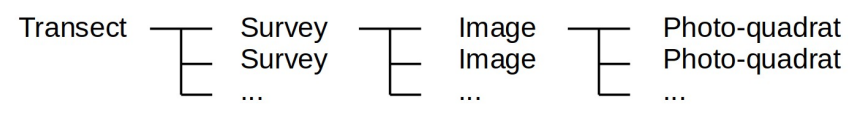

### Test Transect Selection Process

XL Catlin Seaview Survey project team selected testing dataset as a separate set of images from the training dataset to ensure complete independence from the data used to train the network models.

This test dataset was a selection of contiguous images within transects with an extent of 30 m in length, concomitant with most coral reef monitoring programs and best represents the spatial heterogeneity within a site. Therefore, they aggregated the images from the 2 km transects within a standard transect length of 30 m, hereafter called “test transects”. Test transects were selected at random, within the 2 km transects, while ensuring that no test transect contained images used for training the networks [3].

To locate the 30m units (test transects) within the 2km-transects, they used images for all surveyed years in each transect and applied hierarchical clustering with Ward’s method, as implemented in the “hclust” function of R (https://www.mdpi.com/2072-4292/12/3/489/s1). The Ward’s method creates clusters that minimize within-cluster variance in the distance metric (the physical distance among points i.e. images) and cut the cluster at 30m to identify the aggregation groups. From these units, a number
test transects per region were selected at random.

### Selection Criteria from Data

The number of images and points manually annotated per network is presented in https://www.nature.com/articles/s41597-020-00698-6/tables/3. In general, random point annotations were done for about 100 points per photo-quadrat for training sets and 40 or 50 points per photo-quadrat for testing sets [1].

Based on the table referred above, it can be observed that 586,740 annotations were done for 5,801 training photo-quadrats. Moreover, 273,130 annotations were done for 5,747 photo-quadrats from 517 test transects. The average annotations per quadrat for training and test sets are 101.14 and 47.53 respectively.

**Possible Criteria:**

* Quadrats that contain 50 annotation points or less = test set
* Quadrats that contain at least 100 annotation points = training sets

Histogram showing the distribution of # of random point annotations per photoquadrat (image)

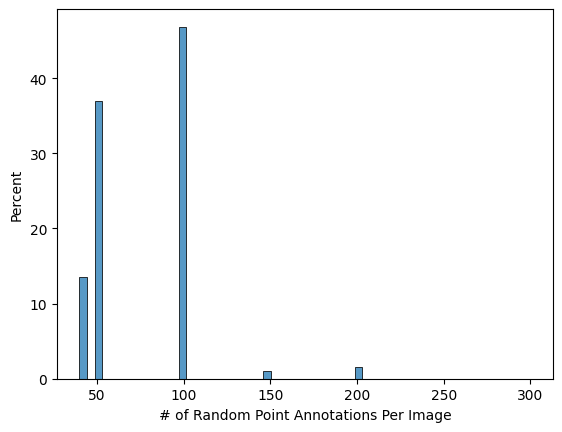

In [ ]:
sns.histplot(
    data=ANNOTATIONS_DF\
            .groupby('quadratid')\
            .agg(points_count=('quadratid', 'count'))\
            .reset_index(),
    x='points_count',
    stat='percent',
    )
plt.xlabel("# of Random Point Annotations Per Image")
plt.show()

Frequency table for # of random point annotations per photoquadrat (image)

In [ ]:
ANNOTATIONS_DF\
    .groupby(['quadratid'])\
    .agg(points_count=('quadratid', 'count'))\
    .reset_index()\
    .groupby(['points_count'])\
    .count()\
    .reset_index()

points_count  quadratid
0            40       1543
1            50       4209
2            80          1
3           100       5336
4           140          3
5           150        111
6           200        182
7           250          1
8           300          1

Region wise frequencies for # of random point annotations per photoquadrat (image)

In [ ]:
ANNOTATIONS_DF\
    .groupby(['quadratid', 'region'])\
    .agg(points_count=('quadratid', 'count'))\
    .reset_index()\
    .groupby(['region', 'points_count'])\
    .agg(quadrats=('quadratid', 'count'))

quadrats
region      points_count          
ATL         50                 958
            100                447
            150                  2
IND_CHA     50                 327
            100                355
            150                  4
IND_MDV     50                 487
            100               1028
            150                 52
            200                 43
            250                  1
            300                  1
PAC_AUS     40                1543
            80                   1
            100                978
            140                  3
            200                132
PAC_IDN_PHL 50                 887
            100                738
            150                 13
PAC_SLB     50                 293
            100                429
            150                  7
            200                  3
PAC_TLS     50                 317
            100                530
            150                 13
            200                  4
PAC_TWN     50                 288
            100                338
            150                 12
PAC_USA     50                 652
            100                493
            150                  8

Check points_count pattern before excluding train-test leakage candidates

In [ ]:
ANNOTATIONS_DF\
    .groupby(['quadratid', 'region', 'data_set'])\
    .agg(points_count=('quadratid', 'count'))\
    .reset_index()\
    .groupby(['region', 'data_set', 'points_count'])\
    .count()

quadratid
region      data_set points_count           
ATL         test     50                  960
            train    100                 449
IND_CHA     test     50                  331
            train    100                 359
IND_MDV     test     50                  540
            train    100                1080
                     200                  44
                     300                   1
PAC_AUS     test     40                 1425
                     80                    1
            train    40                  121
                     100                 981
                     200                 132
PAC_IDN_PHL test     50                  900
            train    100                 751
PAC_SLB     test     50                  300
            train    100                 436
                     200                   3
PAC_TLS     test     49                    1
                     50                  329
            train    1                     1
                     100                 543
                     200                   4
PAC_TWN     test     50                  300
            train    100                 350
PAC_USA     test     50                  660
            train    100                 501

Check points_count pattern after excluding train-test leakage candidates

In [ ]:
ANNOTATIONS_DF\
    .query(f"~ quadratid.isin({train_test_leakage_candidates})")\
    .groupby(['quadratid', 'region', 'data_set'])\
    .agg(points_count=('quadratid', 'count'))\
    .reset_index()\
    .groupby(['region', 'data_set', 'points_count'])\
    .count()

quadratid
region      data_set points_count           
ATL         test     50                  958
            train    100                 447
IND_CHA     test     50                  327
            train    100                 355
IND_MDV     test     50                  487
            train    100                1028
                     200                  43
                     300                   1
PAC_AUS     test     40                 1422
                     80                    1
            train    40                  121
                     100                 978
                     200                 132
PAC_IDN_PHL test     50                  887
            train    100                 738
PAC_SLB     test     50                  293
            train    100                 429
                     200                   3
PAC_TLS     test     50                  316
            train    100                 530
                     200                   4
PAC_TWN     test     50                  288
            train    100                 338
PAC_USA     test     50                  652
            train    100                 493

### Observations

* Data indicates a clear pattern and it agrees with the description provided in the research paper.
* Quadrats that have 50 or 40 random point annotations can be treated as "Test Dataset".
* Quadrats that have 100 or more random points annotations can be treated as "Training Dataset".
* One quadrat contains 80 random point annotations - this can  be treated as "Training Dataset" or excluded from all datasets.

## Annotations Statistics

### Average Points Per Image

In [16]:
ANNOTATIONS_DF.shape[0]/ANNOTATIONS_DF.quadratid.nunique()

75.51330464564855

Determine the distribution of annotations in terms of labels and functional groups within each region or across all regions.

### Functional Group Distribution

In [ ]:
ANNOTATIONS_DF.func_group.value_counts(normalize=True)

Algae                  0.550165
Hard Coral             0.283706
Soft Coral             0.064427
Other                  0.058463
Other Invertebrates    0.033785
Sponge                 0.009454
Name: func_group, dtype: float64

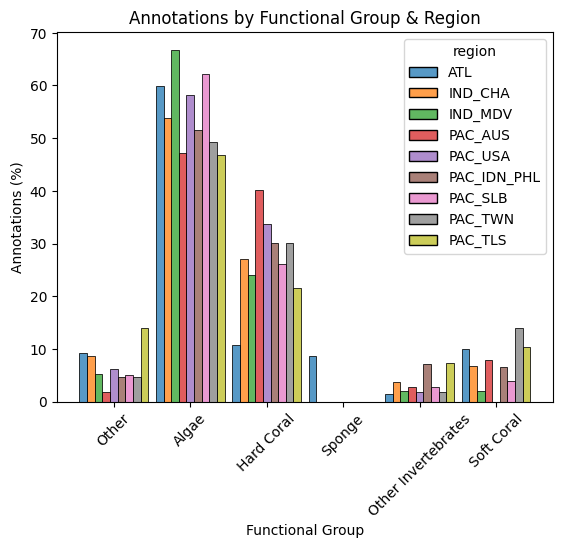

In [ ]:
sns.histplot(
    data=ANNOTATIONS_DF,
    x='func_group',
    stat='percent',
    hue='region',
    multiple='dodge',
    shrink=0.9,
    common_norm=False,
    )
plt.title("Annotations by Functional Group & Region")
plt.xlabel("Functional Group")
plt.ylabel("Annotations (%)")
plt.xticks(rotation=45)
plt.show()

### Alternate Functional Group Distribution

In [ ]:
ANNOTATIONS_DF.func_group_alt.value_counts(normalize=True)

Others        0.651867
Hard Coral    0.283706
Soft Coral    0.064427
Name: func_group_alt, dtype: float64

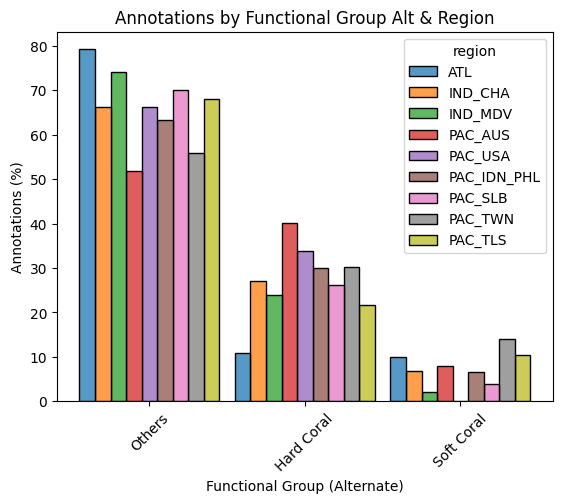

In [ ]:
sns.histplot(
    data=ANNOTATIONS_DF,
    x='func_group_alt',
    stat='percent',
    hue='region',
    multiple='dodge',
    shrink=0.9,
    common_norm=False,
    )
plt.title("Annotations by Functional Group Alt & Region")
plt.xlabel("Functional Group (Alternate)")
plt.ylabel("Annotations (%)")
plt.xticks(rotation=45)
plt.show()

### Labels (Species) Distribution

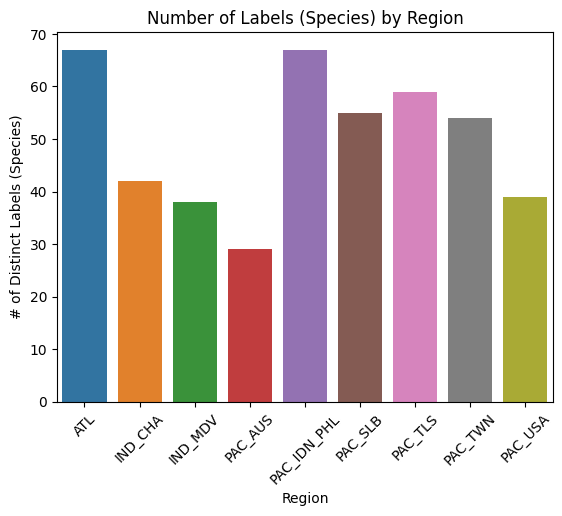

In [ ]:
sns.barplot(
    data=ANNOTATIONS_DF\
            .groupby(['region'])\
            .agg(labels_count=('label_name', 'nunique'))\
            .reset_index(),
    x='region',
    y='labels_count',
    )
plt.title("Number of Labels (Species) by Region")
plt.xlabel("Region")
plt.ylabel("# of Distinct Labels (Species)")
plt.xticks(rotation=45)
plt.show()

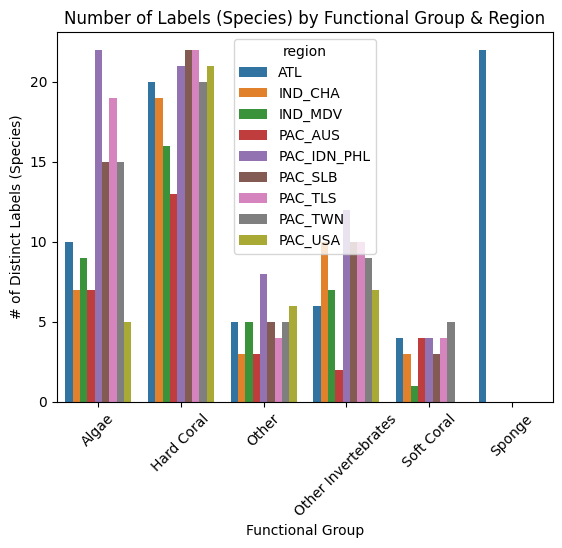

In [ ]:
sns.barplot(
    data=ANNOTATIONS_DF\
            .groupby(['region', 'func_group'])\
            .agg(labels_count=('label_name', 'nunique'))\
            .reset_index(),
    x='func_group',
    y='labels_count',
    hue='region',
    )
plt.title("Number of Labels (Species) by Functional Group & Region")
plt.xlabel("Functional Group")
plt.ylabel("# of Distinct Labels (Species)")
plt.xticks(rotation=45)
plt.show()

### Func Group - Label Combo

In [ ]:
ANNOTATIONS_DF\
    .groupby(['region', 'func_group_alt', 'func_group', 'label', 'label_name'])\
    .agg(points_count=('quadratid', 'count'))\
    .reset_index()

region func_group_alt           func_group       label  \
0        ATL     Hard Coral           Hard Coral        ACER   
1        ATL     Hard Coral           Hard Coral        AGAR   
2        ATL     Hard Coral           Hard Coral        APAL   
3        ATL     Hard Coral           Hard Coral        CNAT   
4        ATL     Hard Coral           Hard Coral        DLAB   
..       ...            ...                  ...         ...   
453  PAC_USA         Others  Other Invertebrates    MINV_Ech   
454  PAC_USA         Others  Other Invertebrates    MINV_OTH   
455  PAC_USA         Others  Other Invertebrates    MINV_Tri   
456  PAC_USA         Others  Other Invertebrates  SINV_HEX_O   
457  PAC_USA         Others  Other Invertebrates  SINV_SPO_M   

                                        label_name  points_count  
0                                     Acervicornis           317  
1                                 Agaricia/Undaria          1122  
2                                         Apalmata           116  
3                                          Cnatans           543  
4                                Dlabyrinthiformis           401  
..                                             ...           ...  
453                                    Echinometra            86  
454                           Mobile invertebrates             5  
455                                    Tripneustes            64  
456  Other sesile invertebrates soft hexacorrallia           201  
457                                         Sponge           984  

[458 rows x 6 columns]

In [ ]:
ANNOTATIONS_DF\
    .groupby(['region', 'func_group_alt', 'func_group', 'label', 'label_name'])\
    .agg(points_count=('quadratid', 'count'))\
    .reset_index()\
    .to_csv(os.path.join(DRIVE_BASE_PATH, 'data', 'SEAVIEW-FUNC-GROUP-LABEL-COMBO.csv'), index=False)

In [ ]:
REGION = REGIONS[1]
print(f"Region of Interest = {REGION}")

Region of Interest = IND_CHA


In [ ]:
ANNOTATIONS_DF.query(f"region == '{REGION}'")\
              .groupby('func_group')\
              .quadratid.count()\
              .reset_index()\
              .rename(columns={'quadratid':'points_count'})\
              .sort_values(by='points_count', ascending=False)

In [ ]:
ANNOTATIONS_DF.query(f"region == '{REGION}'")\
              .groupby('label_name')\
              .quadratid.count()\
              .reset_index()\
              .rename(columns={'quadratid':'points_count'})\
              .sort_values(by='points_count', ascending=False)

### Method Column Data

In [ ]:
ANNOTATIONS_DF.method.value_counts(normalize=True)

random    0.900101
target    0.099899
Name: method, dtype: float64

In [ ]:
ANNOTATIONS_DF\
    .groupby(['method', 'data_set'])\
    .agg(points_count=('quadratid', 'count'))\
    .reset_index()

method data_set  points_count
0  random     test        273129
1  random    train        500841
2  target    train         85900

In [ ]:
ANNOTATIONS_DF\
    .query("method == 'target'")\
    .groupby(['method', 'data_set', 'region'])\
    .agg(points_count=('quadratid', 'count'))

points_count
method data_set region               
target train    ATL             12800
                IND_MDV         18100
                PAC_AUS         47500
                PAC_TLS          7500

### Observations

1. Imbalanced Classes:
 * The different classes are highly imbalanced in terms of number of random point annotations available for each class.
2. Functional Groups:
 * Algae group dominates all other functional groups across all regions as 58% of the total annotations are for this group.
 * Hard Coral group constitutes about 28% of annotations across all regions.
 * Soft Coral group constitutes about 6.5% of annotations across all regions.
 * Soft Coral, Other Invertebrates and Other groups have very low number of annotations across all regions.
3. Label (Species) Names:
 * Each region has anywhere between 28 to 68 different labels.
 * PAC_AUS, IND_MDV, IND_CHA and PAC_USA have lowest number of labels (less than 50).
 * Hard Coral group has most number of labels in general.
4. Method:
 * 90% of annotations belong to "random" method. Remaining 10% belong to "target" method.
 * "target" method is applicable only for train dataset points.
 * Based on sanity check of few images, it is evident that "target" implies specifically targetted selection of annotation points in quadrat instead of random selection.

## Sanity Check Images

### Sample Images List

|Folder|Region #|Quadrat ID|
|---|---|---|
|ATL|1|24044096401|
|IND_CHA|2|36005049601, 36012163401|
|IND_MDV|3|37002013101, 37029097401 (Target)|
|PAC_AUS|4|13002087301, 12021008701 (Target)|
|PAC_USA|5|38007010001|
|PAC_IDN_PHL|6|32030109401, 33014107901, 26013122801,26003029901, 33009233101 Plastic, 33009231201, 32016014101|
|PAC_SLB|7|34019042001, 34006094301|
|PAC_TWN|8|42019060201|
|PAC_TLS|9|30025065001|
|Mismatch||32009271301, 32028198201|

In [ ]:
ANNOTATIONS_DF.query(f"region == '{REGIONS[9]}'").sample()

quadratid    y    x             label_name      label func_group  \
854024  30025065001  844  105  Loose Substrate: Sand  LSUB_SAND      Other   

        method data_set   region func_group_alt  
854024  random    train  PAC_TLS         Others

### Load & View Image

In [36]:
quadrat_id =  17001652802

quadrat_region = \
    ANNOTATIONS_DF[ANNOTATIONS_DF.quadratid == quadrat_id].region.to_list()[0]
quadrat_path = os.path.join(DATA_BASE_PATH, quadrat_region, f"{quadrat_id}.jpg")
quadrat_df = \
    ANNOTATIONS_DF\
        .query(f"quadratid == {quadrat_id}")\
        [['x', 'y', 'func_group', 'func_group_alt', 'label', 'label_name', 'data_set', 'method']]

if os.path.exists(quadrat_path):
    print(f"Quadrat (Image) File Path: {quadrat_path}")

Quadrat (Image) File Path: /content/drive/MyDrive/20231114-FruitPunch-AI-for-Coral-Reefs-2/data/benthic_datasets/point_labels/SEAVIEW/ATL/17001652802.jpg


In [37]:
ANNOTATIONS_DF.query(f"quadratid == {quadrat_id}")

quadratid    y    x      label_name label  func_group  method  \
62500  17001652802  204   97    Macroalgae 1  MLAG       Algae  random   
62501  17001652802   85  136            Turf  Turf       Algae  random   
62502  17001652802  162  188    Algae matrix  AMAT       Algae  random   
62503  17001652802  172   55    Algae matrix  AMAT       Algae  random   
62504  17001652802  170  127    Macroalgae 1  MLAG       Algae  random   
...            ...  ...  ...             ...   ...         ...     ...   
62595  17001652802  971  496    Algae matrix  AMAT       Algae  random   
62596  17001652802  813  572         Cnatans  CNAT  Hard Coral  random   
62597  17001652802  961  659    Algae matrix  AMAT       Algae  random   
62598  17001652802  850  945  Pseudodiploria  PSEU  Hard Coral  random   
62599  17001652802  879  942  Pseudodiploria  PSEU  Hard Coral  random   

      data_set region func_group_alt  
62500    train    ATL         Others  
62501    train    ATL         Others  
62502    train    ATL         Others  
62503    train    ATL         Others  
62504    train    ATL         Others  
...        ...    ...            ...  
62595    train    ATL         Others  
62596    train    ATL     Hard Coral  
62597    train    ATL         Others  
62598    train    ATL     Hard Coral  
62599    train    ATL     Hard Coral  

[100 rows x 10 columns]

In [38]:
quadrat_image = cv2.imread(quadrat_path)
quadrat_image = cv2.cvtColor(quadrat_image, cv2.COLOR_BGR2RGB)

In [39]:
print(f"Shape of Image Array: {quadrat_image.shape}")
print(f"Resolution of Image: {quadrat_image.shape[0] * quadrat_image.shape[1] / 10000 : 0.0f} pixels per cm square")

Shape of Image Array: (1031, 1031, 3)
Resolution of Image:  106 pixels per cm square


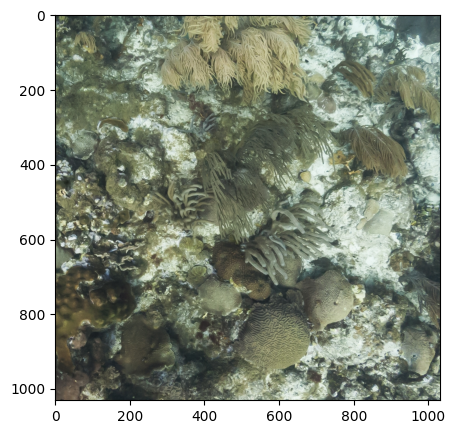

In [41]:
plt.figure(figsize=(5,5))
plt.imshow(quadrat_image)
plt.show()

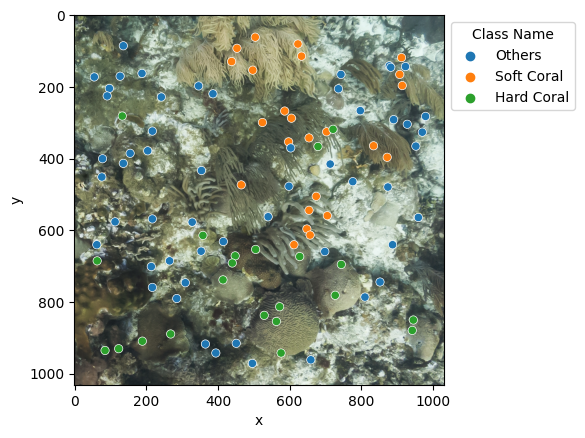

In [44]:
plt.imshow(quadrat_image)
ax = sns.scatterplot(data=quadrat_df, x='x', y='y', hue='func_group_alt')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1), title='Class Name')
plt.show()

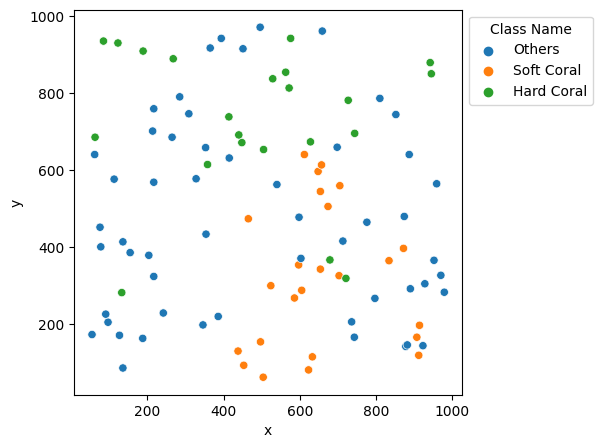

In [45]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(data=quadrat_df, x='x', y='y', hue='func_group_alt')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1), title='Class Name')
plt.show()

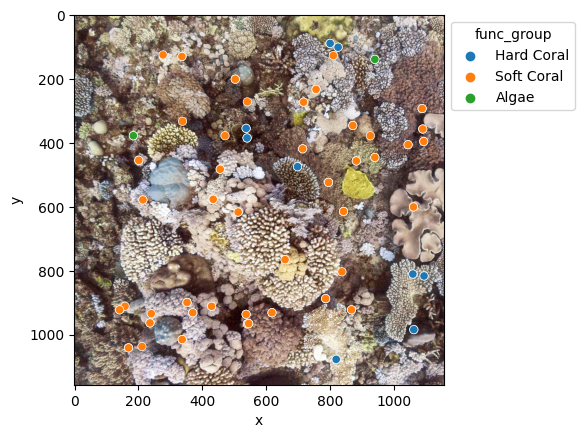

In [32]:
plt.imshow(quadrat_image)
ax = sns.scatterplot(data=quadrat_df, x='x', y='y', hue='func_group')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

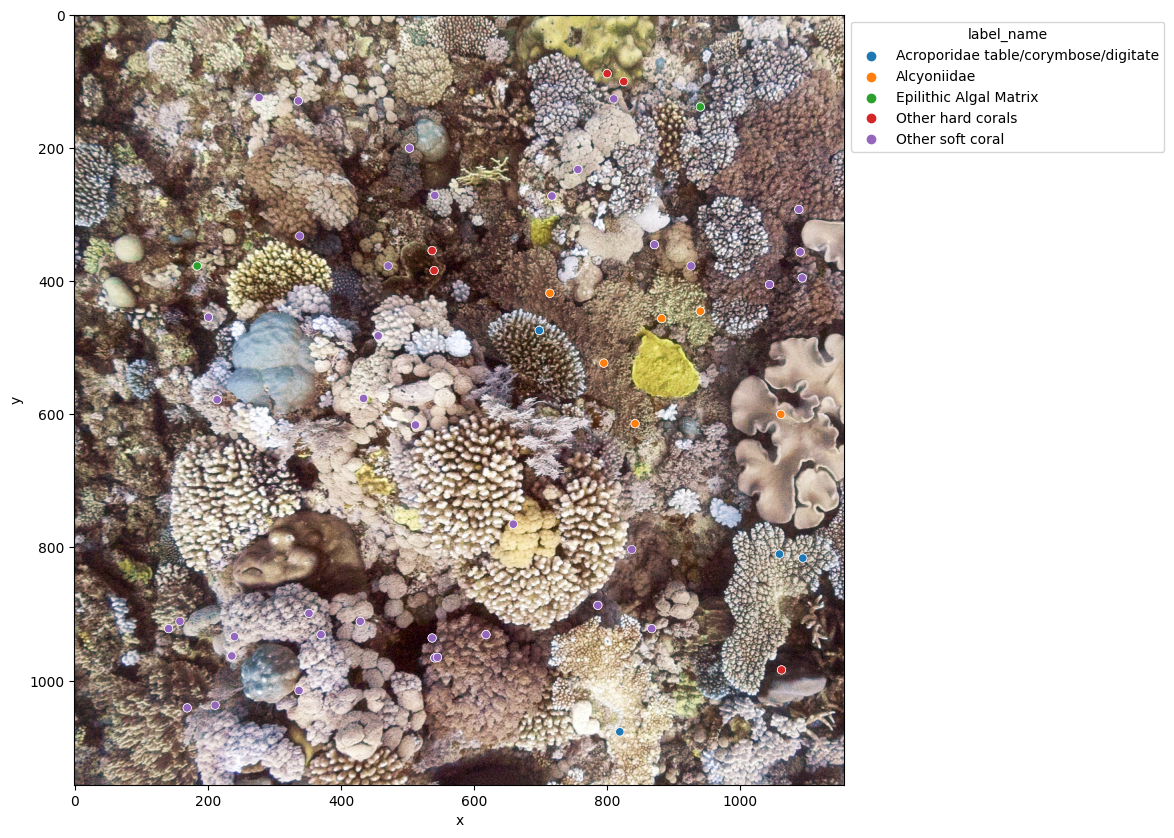

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(quadrat_image)
ax = sns.scatterplot(data=quadrat_df, x='x', y='y', hue='label_name')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
ANNOTATIONS_DF.label_name.nunique()

194

In [ ]:
ANNOTATIONS_DF.query("label_name == 'Hydroids feathery types'").quadratid.nunique()

367

In [ ]:
ANNOTATIONS_DF.query("label_name == 'Hydroids feathery types'").quadratid.count()

1684

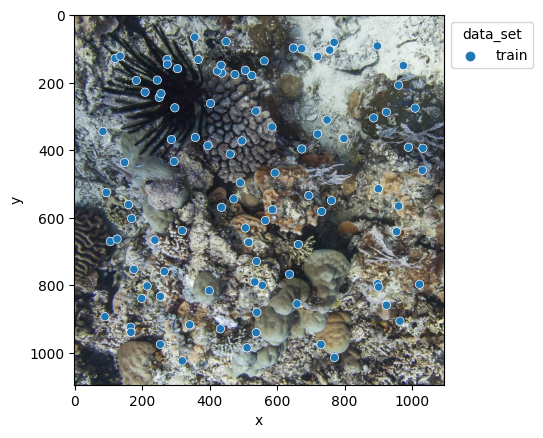

In [ ]:
plt.imshow(quadrat_image)
ax = sns.scatterplot(data=quadrat_df, x='x', y='y', hue='data_set')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

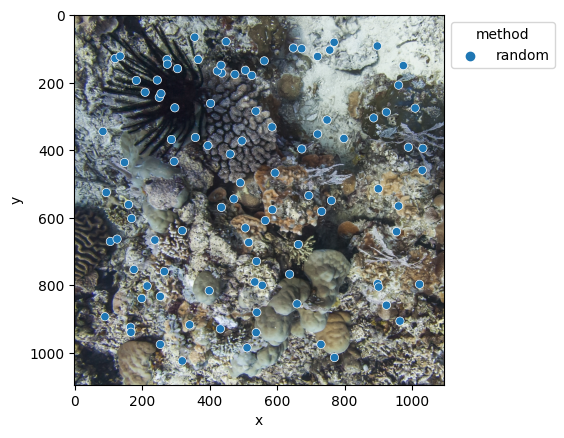

In [ ]:
plt.imshow(quadrat_image)
ax = sns.scatterplot(data=quadrat_df, x='x', y='y', hue='method')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

### Observations

* Image numpy array stores pixel values in the order of Height, Width, Color Channels.
 * Height is Row Index
 * Width is Column Index
* Random Point Annotations are given as x-coordinate, y-coordinate pairs.
 * "x-coordinate" gives the index along "width (column)" dimension of image array.
 * "y-coordinate" gives the index along "height (row)" dimension of image array.
 * x = column index
 * y = row index
* Visualization confirms above relationship as reversing x and y coordinates relationship with image array gives meaningless/wrong/inconsistent annotations.

# Mask Labels Dataset (rs_labelled)

## Global Variables

In [ ]:
DENSE_DATA_PATH = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'rs_labelled')

In [ ]:
DENSE_FOLDERS = {
    1: 'SEAVIEW_ATL', 4: 'SEAVIEW_PAC_AUS', 5: 'SEAVIEW_PAC_USA',
    6: 'SEAVIEW_IDN_PHL',
    }
DENSE_IMAGE_COUNTS = {
    1: 705, 4: 808, 5: 728,
    6: 466,
    }

## Mask Labels Data Frame

Build a data frame based on image file names available under region wise folders located at benthic_datasets > mask_labels > rs_labelled folder

In [ ]:
# initialize a data frame to hold the details of images across all regions
RS_LABELLED_DF = pd.DataFrame()

# scan individual region specific folders and add to main data frame
# each image file is named after quadrat id and is unique
# mask patches (small window) have quadrat id as well as mask patch number 0-XX

# loop through the list of folders in rs_labelled dataset
for region_id, folder in tqdm(DENSE_FOLDERS.items(), total=len(DENSE_FOLDERS)):
    # read image files, mask patches and full mask (stitched)
    image_files = os.listdir(os.path.join(DENSE_DATA_PATH, folder, 'images'))
    mask_patches_files = os.listdir(os.path.join(DENSE_DATA_PATH, folder, 'masks'))
    mask_stitched_files = os.listdir(os.path.join(DENSE_DATA_PATH, folder, 'masks_stitched'))

    # modify file name to keep only quadratid (first 11 digits of file name)
    image_files = [int(x[:11]) for x in image_files]
    mask_patches_files = [int(x[:11]) for x in mask_patches_files]
    mask_stitched_files = [int(x[:11]) for x in mask_stitched_files]

    # create a data frame for this region and store quadratid and other info
    region_wise_rs_images_df = pd.DataFrame(data=image_files, columns=['quadratid'])
    region_wise_rs_images_df['region'] = REGIONS[region_id]
    region_wise_rs_images_df['folder'] = folder
    region_wise_rs_images_df['mask_patches'] = \
        [mask_patches_files.count(x)
        for x in region_wise_rs_images_df.quadratid]
    region_wise_rs_images_df['mask_stitched'] = \
        [mask_stitched_files.count(x)
        for x in region_wise_rs_images_df.quadratid]

    # add train/test split as done by Seaview team from point labels csv file
    region_wise_rs_images_df['seaview_train_test_split'] = \
        [np.sort(ANNOTATIONS_DF[ANNOTATIONS_DF.quadratid==x].data_set.unique())[-1]
            for x in region_wise_rs_images_df.quadratid]

    # add method used by Seaview team to do point annotation from point labels csv file
    region_wise_rs_images_df['point_labels_method'] = \
        [np.sort(ANNOTATIONS_DF[ANNOTATIONS_DF.quadratid==x].method.unique())[-1]
         for x in region_wise_rs_images_df.quadratid]

    # append to main annotations data frame
    RS_LABELLED_DF = \
        pd.concat(
            [RS_LABELLED_DF, region_wise_rs_images_df],
            ignore_index=True,
            )

  0%|          | 0/4 [00:00<?, ?it/s]

## Masks Dataset Statistics

### Missing Values

In [ ]:
RS_LABELLED_DF.isna().sum()

quadratid                   0
region                      0
folder                      0
mask_patches                0
mask_stitched               0
seaview_train_test_split    0
point_labels_method         0
dtype: int64

### Counts by Region

In [ ]:
RS_LABELLED_DF.region.value_counts(sort=False)

ATL            705
PAC_AUS        808
PAC_USA        728
PAC_IDN_PHL    466
Name: region, dtype: int64

In [ ]:
RS_LABELLED_DF.mask_stitched.value_counts()

1    2707
Name: mask_stitched, dtype: int64

### Counts by Train-Test Split

In [ ]:
RS_LABELLED_DF.seaview_train_test_split.value_counts()

test     1573
train    1134
Name: seaview_train_test_split, dtype: int64

In [ ]:
RS_LABELLED_DF.seaview_train_test_split.value_counts(normalize=True)

test     0.581086
train    0.418914
Name: seaview_train_test_split, dtype: float64

In [ ]:
RS_LABELLED_DF\
    .groupby(['region', 'seaview_train_test_split'])\
    .agg(image_count=('seaview_train_test_split', 'count'))

image_count
region      seaview_train_test_split             
ATL         test                              507
            train                             198
PAC_AUS     test                              381
            train                             427
PAC_IDN_PHL test                              254
            train                             212
PAC_USA     test                              431
            train                             297

### Counts by Point Labels Method

In [ ]:
RS_LABELLED_DF\
    .groupby(['region', 'seaview_train_test_split', 'point_labels_method'])\
    .agg(image_count=('seaview_train_test_split', 'count'))\
    .reset_index()

region seaview_train_test_split point_labels_method  image_count
0          ATL                     test              random          507
1          ATL                    train              random          109
2          ATL                    train              target           89
3      PAC_AUS                     test              random          381
4      PAC_AUS                    train              random          270
5      PAC_AUS                    train              target          157
6  PAC_IDN_PHL                     test              random          254
7  PAC_IDN_PHL                    train              random          212
8      PAC_USA                     test              random          431
9      PAC_USA                    train              random          297

# Mask Labels Dataset (reef_support)

## Global Variables

In [ ]:
REEF_DATA_PATH = os.path.join(DRIVE_BASE_PATH, 'data', 'benthic_datasets', 'mask_labels', 'reef_support')
REEF_SUPPORT_MANIFEST_PATH = os.path.join(DRIVE_BASE_PATH, 'data', 'MANIFEST_REEF_SUPPORT_V1.csv')

In [ ]:
REEF_FOLDERS = {
    1: 'SEAVIEW_ATL', 4: 'SEAVIEW_PAC_AUS', 5: 'SEAVIEW_PAC_USA',
    6: 'SEAVIEW_IDN_PHL',
    }
REEF_IMAGE_COUNTS = {
    1: 705, 4: 808, 5: 728,
    6: 466,
    }

In [ ]:
REEF_COLORS = {
    'K': [0, 0, 0],
    'R': [255, 0, 0], 'Y': [255, 255, 0],
    'B': [0, 0, 255], 'O': [255, 165, 0],
}
REEF_COLOR_MAPPING = {
    'K': 0,
    'R': 1, 'Y': 1,
    'B': 2, 'O': 2,
}

## Reef Support Manifest

Build a data frame based on image file names available under region wise folders located at benthic_datasets > mask_labels > reef_support folder

In [ ]:
if os.path.exists(REEF_SUPPORT_MANIFEST_PATH):
    REEF_SUPPORT_DF = pd.read_csv(REEF_SUPPORT_MANIFEST_PATH, header='infer')
    print(f"Shape of Reef Support dataset manifest: {REEF_SUPPORT_DF.shape}")
else:
    print(f"Dataset manifest not found in provided path")

Shape of Reef Support dataset manifest: (2707, 15)


In [ ]:
if REEF_SUPPORT_DF.shape[1] >= 15:
    print(f"Dataset manifest has been loaded already")
else:
    # initialize a data frame to hold the details of images across all regions
    REEF_SUPPORT_DF = pd.DataFrame()

    # scan individual region specific folders and add to main data frame
    # each image file is named after quadrat id and is unique
    # mask patches (small window) have quadrat id as well as mask patch number 0-XX

    # loop through the list of folders in rs_labelled dataset
    for region_id, folder in tqdm(REEF_FOLDERS.items(), total=len(REEF_FOLDERS)):
        # read image files, mask patches and full mask (stitched)
        image_files = os.listdir(os.path.join(REEF_DATA_PATH, folder, 'images'))
        mask_patches_files = os.listdir(os.path.join(REEF_DATA_PATH, folder, 'masks'))
        mask_stitched_files = os.listdir(os.path.join(REEF_DATA_PATH, folder, 'masks_stitched'))

        # modify file name to keep only quadratid (first 11 digits of file name)
        image_files = [int(x[:11]) for x in image_files]
        mask_patches_files = [int(x[:11]) for x in mask_patches_files]
        mask_stitched_files = [int(x[:11]) for x in mask_stitched_files]

        # create a data frame for this region and store quadratid and other info
        region_wise_rs_images_df = pd.DataFrame(data=image_files, columns=['quadratid'])
        region_wise_rs_images_df['region'] = REGIONS[region_id]
        region_wise_rs_images_df['folder'] = folder
        region_wise_rs_images_df['mask_patches'] = \
            [mask_patches_files.count(x)
            for x in region_wise_rs_images_df.quadratid]
        region_wise_rs_images_df['mask_stitched'] = \
            [mask_stitched_files.count(x)
            for x in region_wise_rs_images_df.quadratid]

        # append to main annotations data frame
        REEF_SUPPORT_DF = \
            pd.concat(
                [REEF_SUPPORT_DF, region_wise_rs_images_df],
                ignore_index=True,
                )

Dataset manifest has been loaded already


In [ ]:
print(f"Shape of Reef Support Dense Masks Dataset: {REEF_SUPPORT_DF.shape}")

Shape of Reef Support Dense Masks Dataset: (2707, 15)


In [ ]:
REEF_SUPPORT_DF.head(2)

quadratid region       folder  mask_patches  mask_stitched  height  \
0  17001652802    ATL  SEAVIEW_ATL            41              1    1031   
1  17001738002    ATL  SEAVIEW_ATL             2              1    1031   

   width  mask_height  mask_width  other_pixels  hard_coral_pixels  \
0   1031         1031        1031       1749687             740922   
1   1031         1031        1031       1961490            1146417   

   soft_coral_pixels seaview_split points_selection_method  point_labels_count  
0             698274         train                  random                 100  
1              80976          test                  random                  50

## Enrich Dataset Manifest

In [ ]:
# function to generate masks with encoded labels from color coded format
def encode_mask_colors(mask, colors, color_mapping):
    mask_enc = np.zeros(mask.shape, dtype=int)

    for color_code, label in color_mapping.items():
        mask_enc[np.all(mask == colors[color_code], axis=-1), :] = label

    return mask_enc[:,:,:]

In [ ]:
if REEF_SUPPORT_DF.shape[1] >= 15:
    print(f"Dataset manifest has been enriched already")
else:
    additional_details_list = []

    for index, row in tqdm(REEF_SUPPORT_DF.iterrows(), total=REEF_SUPPORT_DF.shape[0]):
        # get size of image
        width, height = imagesize.get(os.path.join(REEF_DATA_PATH, row.folder, 'images', f"{row.quadratid}.jpg"))

        # read stitched mask to get size details and coral class distribution
        mask_stitched = cv2.imread(os.path.join(REEF_DATA_PATH, row.folder, 'masks_stitched', f"{row.quadratid}_mask.png"))
        mask_stitched = cv2.cvtColor(mask_stitched, cv2.COLOR_BGR2RGB)
        mask_stitched_enc = encode_mask_colors(mask_stitched, REEF_COLORS, REEF_COLOR_MAPPING)
        mask_classes = np.unique(mask_stitched_enc, return_counts=True)
        mask_classes_dict = dict(zip(mask_classes[0], mask_classes[1]))

        additional_details_dict = \
            dict(
                height=height,
                width=width,
                mask_height=mask_stitched.shape[0],
                mask_width=mask_stitched.shape[1],
                other_pixels=mask_classes_dict.get(0, 0),
                hard_coral_pixels=mask_classes_dict.get(1, 0),
                soft_coral_pixels=mask_classes_dict.get(2, 0),
            )
        additional_details_list.append(additional_details_dict)

    # enrich reef support dataset manifest with the additional columns derived above
    REEF_SUPPORT_DF[list(additional_details_dict.keys())] = pd.DataFrame(additional_details_list)

    # add train/test split as done by Seaview team from point labels csv file
    REEF_SUPPORT_DF['seaview_split'] = \
        [np.sort(ANNOTATIONS_DF[ANNOTATIONS_DF.quadratid==x].data_set.unique())[-1]
            for x in REEF_SUPPORT_DF.quadratid]

    # add method used by Seaview team to do point annotation from point labels csv file
    REEF_SUPPORT_DF['points_selection_method'] = \
        [np.sort(ANNOTATIONS_DF[ANNOTATIONS_DF.quadratid==x].method.unique())[-1]
            for x in REEF_SUPPORT_DF.quadratid]

    # add number of point labels available for each image from point labels csv file
    REEF_SUPPORT_DF['point_labels_count'] = \
        [ANNOTATIONS_DF[ANNOTATIONS_DF.quadratid==x].shape[0]
            for x in REEF_SUPPORT_DF.quadratid]

Dataset manifest has been enriched already


In [ ]:
REEF_SUPPORT_DF.head(2)

quadratid region       folder  mask_patches  mask_stitched  height  \
0  17001652802    ATL  SEAVIEW_ATL            41              1    1031   
1  17001738002    ATL  SEAVIEW_ATL             2              1    1031   

   width  mask_height  mask_width  other_pixels  hard_coral_pixels  \
0   1031         1031        1031       1749687             740922   
1   1031         1031        1031       1961490            1146417   

   soft_coral_pixels seaview_split points_selection_method  point_labels_count  
0             698274         train                  random                 100  
1              80976          test                  random                  50

## Save Reef Support Manifest

In [ ]:
# Uncomment and change csv file name as appropriate before running this cell
# REEF_SUPPORT_DF.to_csv(os.path.join(DRIVE_BASE_PATH, 'data', 'MANIFEST_REEF_SUPPORT_V2.csv'), index=False)

## Sanity Check

### Data Types

In [ ]:
REEF_SUPPORT_DF.dtypes

quadratid                   int64
region                     object
folder                     object
mask_patches                int64
mask_stitched               int64
height                      int64
width                       int64
mask_height                 int64
mask_width                  int64
other_pixels                int64
hard_coral_pixels           int64
soft_coral_pixels           int64
seaview_split              object
points_selection_method    object
point_labels_count          int64
dtype: object

In [ ]:
REEF_SUPPORT_DF = \
    REEF_SUPPORT_DF.astype(
        {
            'mask_patches': np.int16,
            'mask_stitched': np.int16,
            'height': np.int16,
            'width': np.int16,
            'mask_height': np.int16,
            'mask_width': np.int16,
            'point_labels_count': np.int16,
            }
        )

In [ ]:
REEF_SUPPORT_DF.dtypes

quadratid                   int64
region                     object
folder                     object
mask_patches                int16
mask_stitched               int16
height                      int16
width                       int16
mask_height                 int16
mask_width                  int16
other_pixels                int64
hard_coral_pixels           int64
soft_coral_pixels           int64
seaview_split              object
points_selection_method    object
point_labels_count          int16
dtype: object

### Summary Statistics

In [ ]:
REEF_SUPPORT_DF.describe()

quadratid  mask_patches  mask_stitched       height        width  \
count  2.707000e+03   2707.000000         2707.0  2707.000000  2707.000000   
mean   2.665012e+10     18.693388            1.0  1271.696343  1271.696712   
std    1.149198e+10     21.183005            0.0   342.184486   342.184740   
min    1.000100e+10      0.000000            1.0   664.000000   664.000000   
25%    1.502616e+10      2.000000            1.0  1031.000000  1031.000000   
50%    2.503212e+10     12.000000            1.0  1223.000000  1223.000000   
75%    3.801419e+10     27.000000            1.0  1398.000000  1398.000000   
max    4.503413e+10    176.000000            1.0  2500.000000  2500.000000   

       mask_height   mask_width  other_pixels  hard_coral_pixels  \
count  2707.000000  2707.000000  2.707000e+03       2.707000e+03   
mean   1271.696343  1271.696712  2.962679e+06       2.086952e+06   
std     342.184486   342.184740  2.321371e+06       2.681791e+06   
min     664.000000   664.000000  0.000000e+00       0.000000e+00   
25%    1031.000000  1031.000000  1.563074e+06       2.647860e+05   
50%    1223.000000  1223.000000  2.538996e+06       9.908790e+05   
75%    1398.000000  1398.000000  3.947694e+06       2.872058e+06   
max    2500.000000  2500.000000  1.727632e+07       1.875000e+07   

       soft_coral_pixels  point_labels_count  
count       2.707000e+03         2707.000000  
mean        1.531455e+05           69.955670  
std         4.643987e+05           28.776445  
min         0.000000e+00           40.000000  
25%         0.000000e+00           50.000000  
50%         0.000000e+00           50.000000  
75%         6.553050e+04          100.000000  
max         8.482461e+06          200.000000

### Missing Values

In [ ]:
REEF_SUPPORT_DF.isna().sum()

quadratid                  0
region                     0
folder                     0
mask_patches               0
mask_stitched              0
height                     0
width                      0
mask_height                0
mask_width                 0
other_pixels               0
hard_coral_pixels          0
soft_coral_pixels          0
seaview_split              0
points_selection_method    0
point_labels_count         0
dtype: int64

### Counts by Region

In [ ]:
REEF_SUPPORT_DF.region.value_counts(sort=False)

ATL            705
PAC_AUS        808
PAC_USA        728
PAC_IDN_PHL    466
Name: region, dtype: int64

In [ ]:
REEF_SUPPORT_DF\
    .groupby(['region'])\
    .agg(
        samples_count=('quadratid', 'count'),
        point_labels_min=('point_labels_count', 'min'),
        point_labels_max=('point_labels_count', 'max')
        )\
    .reset_index()

region  samples_count  point_labels_min  point_labels_max
0          ATL            705                50               150
1      PAC_AUS            808                40               200
2  PAC_IDN_PHL            466                50               150
3      PAC_USA            728                50               150

### Counts by Mask Patches

In [ ]:
REEF_SUPPORT_DF\
    .groupby(['mask_patches'])\
    .agg(samples_count=('quadratid', 'count'))\
    .reset_index()

mask_patches  samples_count
0               0             11
1               1            639
2               2            111
3               3             49
4               4             59
..            ...            ...
108           142              2
109           147              1
110           166              1
111           171              1
112           176              1

[113 rows x 2 columns]

In [ ]:
REEF_SUPPORT_DF\
    .groupby(['mask_stitched'])\
    .agg(samples_count=('quadratid', 'count'))\
    .reset_index()

mask_stitched  samples_count
0              1           2707

### Image Size

In [ ]:
REEF_SUPPORT_DF.query("height != width")

quadratid   region           folder  mask_patches  mask_stitched  \
1003  12012080709  PAC_AUS  SEAVIEW_PAC_AUS            17              1   

      height  width  mask_height  mask_width  other_pixels  hard_coral_pixels  \
1003    1506   1507         1506        1507       2586444            4222182   

      soft_coral_pixels  
1003                  0

In [ ]:
REEF_SUPPORT_DF[['height', 'width']].describe()

height        width
count  2707.000000  2707.000000
mean   1271.696343  1271.696712
std     342.184486   342.184740
min     664.000000   664.000000
25%    1031.000000  1031.000000
50%    1223.000000  1223.000000
75%    1398.000000  1398.000000
max    2500.000000  2500.000000

## POC - PLASPIX-V1 & V2

Selection of samples for proof of concept

In [ ]:
REEF_SUPPORT_DF\
    .query("height > 1024 and height < 1280")\
    .query("other_pixels > 0 & hard_coral_pixels > 0 & soft_coral_pixels > 0")\
    .query("seaview_split == 'train'")\
    .query("points_selection_method == 'random'")\
    .query("point_labels_count > 50")\
    .folder.value_counts()

SEAVIEW_ATL        32
SEAVIEW_IDN_PHL    30
SEAVIEW_PAC_AUS    16
Name: folder, dtype: int64

In [ ]:
print(
REEF_SUPPORT_DF\
    .query("height > 1024 and height < 1280")\
    .query("other_pixels > 0 & hard_coral_pixels > 0 & soft_coral_pixels > 0")\
    .query("seaview_split == 'train'")\
    .query("points_selection_method == 'random'")\
    .query("point_labels_count > 50")\
    .quadratid.astype(str).to_list()
)

['17001652802', '17004415601', '17004426901', '17006100402', '17017815902', '17019937902', '17024674002', '17037023502', '17039196602', '20046237101', '20046250301', '24025044801', '24024273201', '24026161301', '24026197901', '24026202701', '24027301501', '24028012601', '24028014601', '24033227902', '24044098401', '24047242502', '24047242701', '25009056001', '25015032701', '25016075501', '25016076601', '25016076301', '25017148301', '25017185701', '25017147501', '25018038701', '10006094801', '10006098302', '10006106902', '10006110502', '10006112502', '10006118501', '10006118801', '10006121301', '10006123201', '10019019402', '10020090701', '10020110801', '10020146102', '10020118801', '10001003801', '10001007101', '26013132801', '26013126301', '26013130401', '32001034601', '32001087101', '32002090001', '32001088201', '32002112201', '32009246801', '32009258401', '32009268301', '32009271301', '32010024701', '32011066301', '32011080501', '32012164201', '32012165201', '32016011301', '32016011

In [ ]:
print(
REEF_SUPPORT_DF\
    .query("height > 1024 and height < 1280")\
    .query("seaview_split == 'train'")\
    .query("points_selection_method == 'random'")\
    .query("point_labels_count > 50")\
    .groupby(['folder'])\
    .sample(n=10, random_state=42)\
    .quadratid.to_list()
)

[25015032701, 24047242502, 25016076301, 17019885502, 20046237101, 24026197901, 17022848302, 24026202701, 17004426901, 24026161301, 33017007801, 33014150401, 32018169001, 32018141901, 33004071001, 32009246801, 33017065101, 33014186501, 33004046601, 33006260501, 10019019402, 10001003901, 10006105602, 10006106902, 10006112801, 10006112702, 10001003801, 10006110801, 10006112502, 10006123201, 38012068901, 38046287701, 38017140901, 38008134901, 38007026701, 38024207301, 38038103501, 38043236701, 38035067401, 38032166501]
